In [433]:
# import wykorzystywanych bibliotek
from sklearn.model_selection import train_test_split
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, ensemble
from sklearn.neural_network import MLPClassifier

In [434]:
# klasa dataset, pobierajace dataset i zawierająca operacje na nim
class dataset:
    def get_data(self, datasetname):
        return pd.read_csv(datasetname,encoding = "ISO-8859-1")
    def get_even(self,diate): #funkcja wyrównująca ilość outcome
        d1 = diate[diate.Outcome != 1]
        d2 = diate[diate.Outcome != 0]
        d1 = d1.iloc[:len(d1.index)//2]
        diate = pd.concat([d1,d2])
        diate = diate.sample(frac = 1)
        return diate
    def delete_column(self,diate, columnname):
        return diate.drop([columnname], axis=1)

In [435]:
# test casy

In [436]:
dataset1 = dataset()
diate = dataset1.get_data('diabetes.csv')
diate.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [437]:
# wstępna analiza danych statystycznych
diate.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot: >

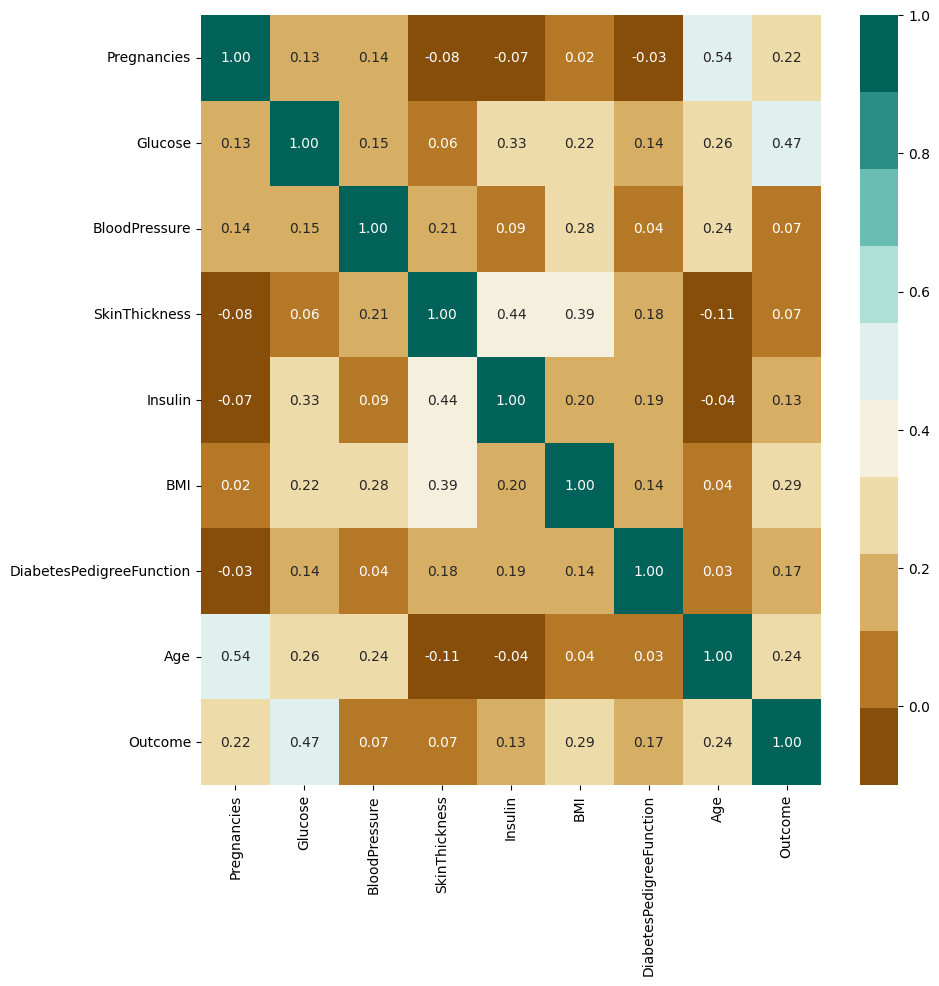

In [438]:
correlations = diate.corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.color_palette("BrBG", 10)
sns.heatmap(correlations, cmap=colormap, annot=True, fmt=".2f")

<AxesSubplot: >

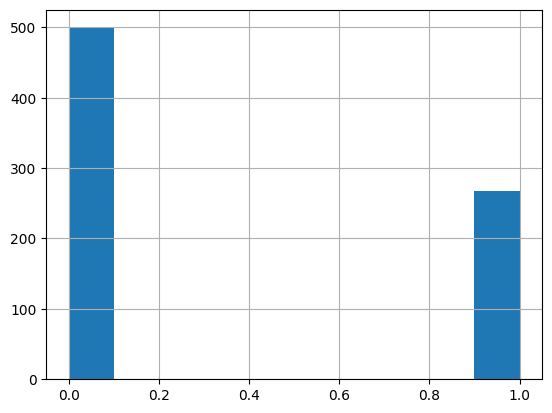

In [439]:
diate['Outcome'].hist(bins=10)

<AxesSubplot: >

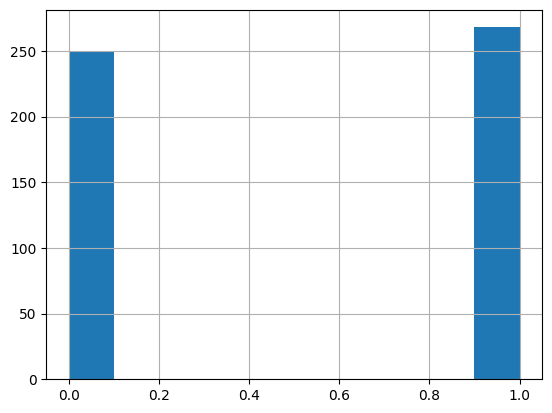

In [440]:
#jak widzimy wyników 0 jest dwa razy więcej niż 1, żeby uprościć dataset obetniemy połowę wyników 0
diate = dataset1.get_even(diate)
diate['Outcome'].hist(bins=10)

In [441]:
#sprawdzanie czy ktoras z kolumn zawiera wartosci null
print(diate.isnull().values.any())

False


<AxesSubplot: >

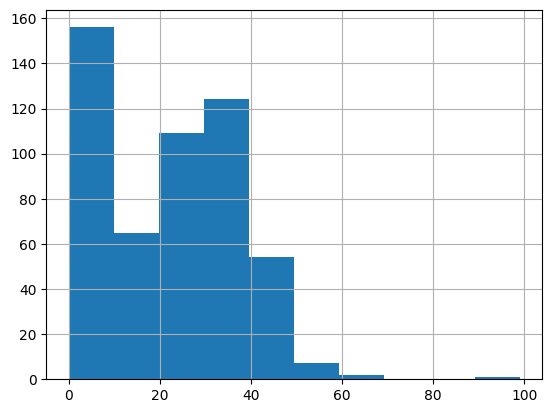

In [442]:
#mozemy jednak zauwazyc ze mimo ze nie ma wartosci null, kolumna skinthickness ma w wiekszosci 0, psuje tez przez to koncowe wyniki
diate['SkinThickness'].hist(bins=10)

<AxesSubplot: >

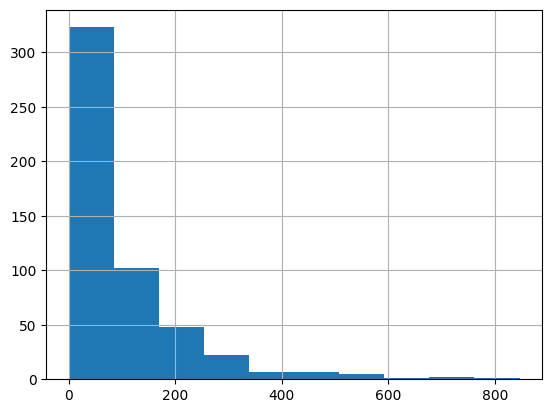

In [443]:
#to samo dzieje sie w kolumnie insulin
diate['Insulin'].hist(bins=10)

In [444]:
#usuwamy powyzej wymienione kolumny
diate = dataset1.delete_column(diate, 'SkinThickness')
diate = dataset1.delete_column(diate, 'Insulin')

In [445]:
class trener:
    accuracy_compare = {'LR' : "",'SVM' : "",'RV' : "",'NN' : "" }
    accuracy = []
    q_test= []
    y_test= []
    q_train= []
    y_train = []
    
    def __init__(self, q, y):
        self.q_train, self.q_test, self.y_train, self.y_test = train_test_split(q, y, test_size=0.2, random_state=554)
    
    def train_model(self, classifier, feature_vector_train, label, feature_vector_valid):
        # trenuj model
        classifier.fit(feature_vector_train, label)
        
        with open('titanic_classifier.pickle', 'wb') as handle:
            pickle.dump(classifier, handle)
        
        # wygeneruj przewidywania modelu dla zbioru testowego
        predictions = classifier.predict(feature_vector_valid)
        
        # dokonaj ewaluacji modelu na podstawie danych testowych
        scores = list(metrics.precision_recall_fscore_support(predictions, self.y_test))
        score_vals = [
            metrics.mean_squared_error(predictions, self.y_test),
            metrics.mean_absolute_error(predictions, self.y_test)
        ]
        return score_vals
    
    def logistic_regression(self):
        self.accuracy = self.train_model(linear_model.LogisticRegression(), self.q_train, self.y_train, self.q_test)
        self.accuracy_compare['LR'] = self.accuracy
        
    def support_vector_machine(self):
        self.accuracy = self.train_model(svm.SVC(), self.q_train, self.y_train, self.q_test)
        self.accuracy_compare['SVM'] = self.accuracy
    
    def random_forest_tree(self):
        self.accuracy = self.train_model(ensemble.RandomForestClassifier(), self.q_train, self.y_train, self.q_test)
        self.accuracy_compare['RF'] = self.accuracy
        
    def neural_network(self):
        mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
        self.accuracy = self.train_model(mlp, self.q_train, self.y_train, self.q_test)
        self.accuracy_compare['NN'] = self.accuracy
    
    def porownanie_modeli(self):
        df_compare = pd.DataFrame(self.accuracy_compare, index = ['mse', 'mae'])
        df_compare.plot(kind='bar')

In [446]:
#rozdzielanie datasetu 
q = diate.drop('Outcome', axis=1).to_numpy()
y = diate.loc[:, 'Outcome'].to_numpy()

In [447]:
#wytrenowanie modelu
trener1 = trener(q,y)

#model 1
trener1.logistic_regression()

#model 2
trener1.support_vector_machine()

#model 3
trener1.random_forest_tree()

#model 4
trener1.neural_network()

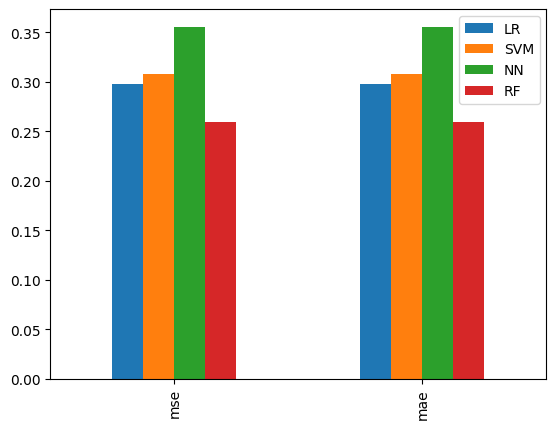

In [448]:
trener1.porownanie_modeli()

In [ ]:
# Wniosek
# Wyniki nie wyszły satysfakcjonujące. Nie można się opierać na powyższym datasecie, należałoby wybrać dataset z większą ilością danych.